In [1]:
import os 
import sys 
import glob 
import numpy as np 
from math import *
from pointCloudsDescriptor import PointCloudFEvaluator

%matplotlib inline 
import matplotlib.pyplot as plt 

# Methods definition - plot histograms

In [2]:
def plot_comparison(datas, nbbins = 80):
    """
    Estimate and compare the histograms of different point clouds 
    NOTE: Like in the process all the densities are mixed, the scale of the 
    frequencies wont be 1
    :Arguments:
        :datas: dict, {'histName0': list(densities0), ...., "histNameN": list(densitiesN) }
        :nbbins: int, number of bins to calculate 
    """
    _, globalbins = np.histogram(np.concatenate(list(datas.values())), bins=nbbins)
    plt.figure(figsize=(15,5))
    for name, idensities in datas.items():
        hist, bins = np.histogram(idensities, bins=globalbins)
        hist = hist/len(idensities)
        bins = bins / 10**6
        width = np.diff(bins)
        binscenters = (bins[:-1] + bins[1:]) / 2 
        plt.bar(binscenters, hist, align='center', width=width, alpha=0.5)
        plt.plot(bins[:-1]+width/2, hist, label = name)
    plt.legend()

In [87]:
def compare_densities(dicDensities, nbins=80, plot_dpi=300, xlabel="Densities per mm^2", 
                    ylabel="Frequency per Points", scaler=10e6):
    maxDensities_freq = 0
    _, bins_of_ref = np.histogram(np.concatenate(list(dicDensities.values())), bins=nbins)
    legends = []
    maxFreqPc = ""
    # Select the frequencie of reference 
    for a_key in dicDensities.keys():
        a_freq, _ = np.histogram(dicDensities[a_key], bins=bins_of_ref)
        if(max(a_freq) > maxDensities_freq):
            maxDensities_freq = max(a_freq)
            maxFreqPc = a_key
        else:
            continue 
    #print("The maximu freq correspond to %s" %(maxFreqPc))
    plt.figure(dpi=plot_dpi)
    width = 0
    for a_key in dicDensities.keys():
        a_freq, _ = np.histogram(dicDensities[a_key], bins=bins_of_ref)
        # Scale the frequencies
        a_freq = a_freq/maxDensities_freq
        # Bar parameters
        binscenters = ((bins_of_ref[:-1] + bins_of_ref[1:])/2)/scaler
        width = (bins_of_ref[1]-bins_of_ref[0])/scaler
        #Plot
        plt.bar(binscenters, a_freq, width, 
                align='center', alpha=1/len(list(dicDensities.keys())))
        plt.plot((bins_of_ref[:-1]/scaler)+(width)/scaler, 
                 a_freq)
        legends.append(a_key)
        plt.legend(legends)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)

# Load pointclouds

In [4]:
def load_datas(path, files_format="txt"):
    """
    Create a dictionary with the numpy arrays that represent each 
    point cloud 
    
    :Arguments:
        :path: str, Path to the folder with the point clouds
        :files_format: str, String with the file format, default: txt
    :Output:
        dict, {'file_name0':np.array[] .... 'file_nameN':np.array[]}
    """
    files = glob.glob( os.path.join( path, "*.%s" %(files_format)) )
    print("-> Found %i files\n" %(len(files)))
    datas = {}
    for  idx1, afile in enumerate(files):
        pointcloud_name = os.path.split(afile)[-1].split(".")[0]
        print("  -> Load file [%i/%i]" %(idx1+1, len(files)), end="\r" if (idx1<len(files)) else "\n" )
        try:
            datas[pointcloud_name] = np.loadtxt(afile)[:,0:3]
        except ValueError as err:
            datas[pointcloud_name] = np.loadtxt(afile, delimiter=",")[:,0:3]
    return datas

# Calculate the point cloud densities -- Density per point 

In [5]:
def compute_densities(datas, radius=0.1):
    pcEval = PointCloudFEvaluator()
    densities = {}
    for  idx1, (afile,a_pc) in enumerate(datas.items()):
        print("Density file [%i/%i]" %(idx1+1, len(datas)), end="\r" if (idx1<len(datas)) else "\n" )
        densities[afile] = pcEval.get_point_cloud_density(a_pc, radius)
    return densities

In [6]:
def compute_densities2(path, radius=0.1):
    print(" -> Loading Data")
    real_data_pointclouds = load_datas(path)
    print(" -> Calculating Densities")
    real_scans_densities = compute_densities(real_data_pointclouds, radius=radius)
    print("-> OK")
    return real_scans_densities 

# Start Processing - Whole tree rows 

In [7]:
real_data_path =  "/home/jprb/Documents/annotated_real_data/noFloor/"
synthetic_sres006 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/230111_jitter_04_rw_04_sres_017/"

In [8]:
real_scans_densities = compute_densities2(real_data_path)

 -> Loading Data
-> Found 7 files

 -> Calculating Densities
-> OKty file [7/7]


In [9]:
densities_synthetic = compute_densities2(synthetic_sres006)

 -> Loading Data
-> Found 5 files

 -> Calculating Densities
-> OKty file [5/5]


In [12]:
dict2plot =  {
                "real densities" : np.concatenate(list(real_scans_densities.values())),
                "Selected densities" : np.concatenate(list(densities_synthetic.values())),
              }

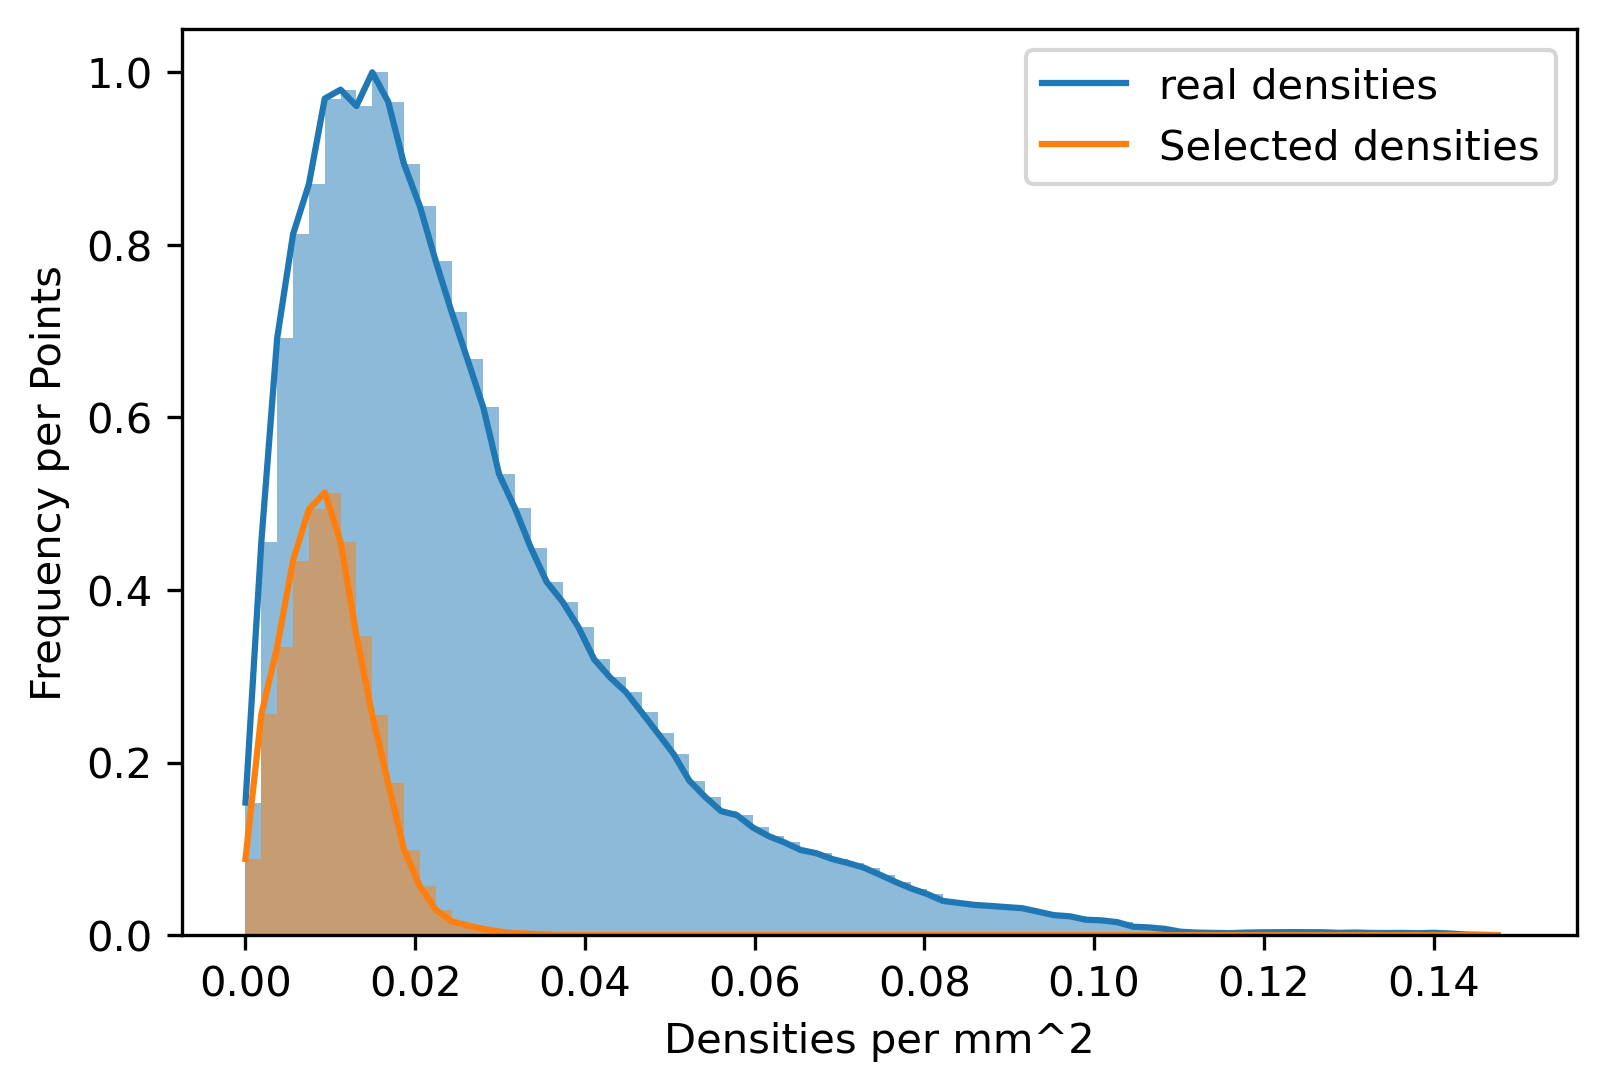

In [95]:
compare_densities(dict2plot, nbins=80, scaler=10e6)

# Start processing of the trees by row position 

In [42]:
synthetic_pos1 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/230111_jitter_04_rw_04_sres_017/by_pos/pos1/"
synthetic_pos2 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/230111_jitter_04_rw_04_sres_017/by_pos/pos2/"
synthetic_pos3 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/230111_jitter_04_rw_04_sres_017/by_pos/pos3/"

In [43]:
dens_p1sy =  compute_densities2(synthetic_pos1)
dens_p2sy =  compute_densities2(synthetic_pos2)
dens_p3sy =  compute_densities2(synthetic_pos3)

 -> Loading Data
-> Found 2 files

 -> Calculating Densities
-> OKty file [2/2]
 -> Loading Data
-> Found 2 files

 -> Calculating Densities
-> OKty file [2/2]
 -> Loading Data
-> Found 1 files

 -> Calculating Densities
-> OKty file [1/1]


In [44]:
real_p1 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/to_evaluate/independet_plots/real/pos1/"
real_p2 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/to_evaluate/independet_plots/real/pos2/"
real_p3 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/to_evaluate/independet_plots/real/pos3/"

In [45]:
dens_p1real =  compute_densities2(real_p1)
dens_p2real =  compute_densities2(real_p2)
dens_p3real =  compute_densities2(real_p3)

 -> Loading Data
-> Found 1 files

 -> Calculating Densities
-> OKty file [1/1]
 -> Loading Data
-> Found 1 files

 -> Calculating Densities
-> OKty file [1/1]
 -> Loading Data
-> Found 1 files

 -> Calculating Densities
-> OKty file [1/1]


# Position 1 and 5 - corners

In [52]:
data_p1p5 = {
    "real_scan_p1&p5": np.concatenate(list(dens_p1real.values())),
    "synthetic_scan_p1&p5": np.concatenate(list(dens_p1sy.values()))
}

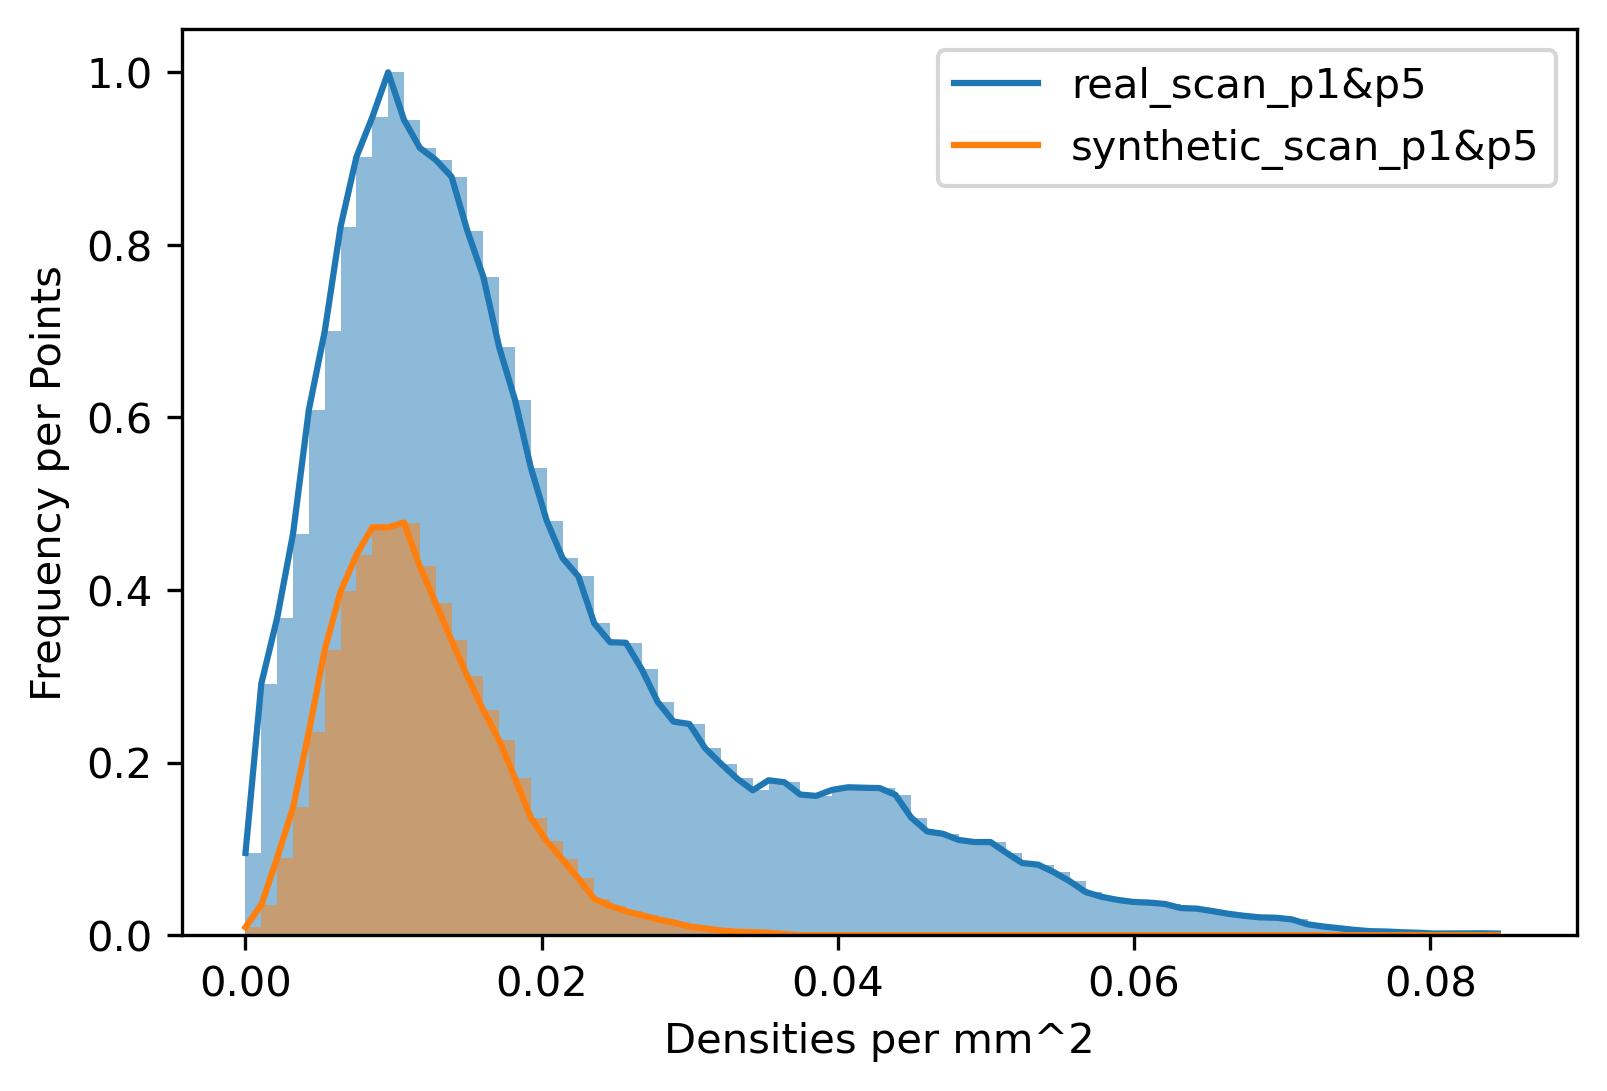

In [96]:
compare_densities(data_p1p5, nbins=80)

# Position 2 and 4

In [54]:
data_p2p4 = {
    "real_scan_p2&p4": np.concatenate(list(dens_p2real.values())),
    "synthetic_scan_p2&p4": np.concatenate(list(dens_p2sy.values()))
}

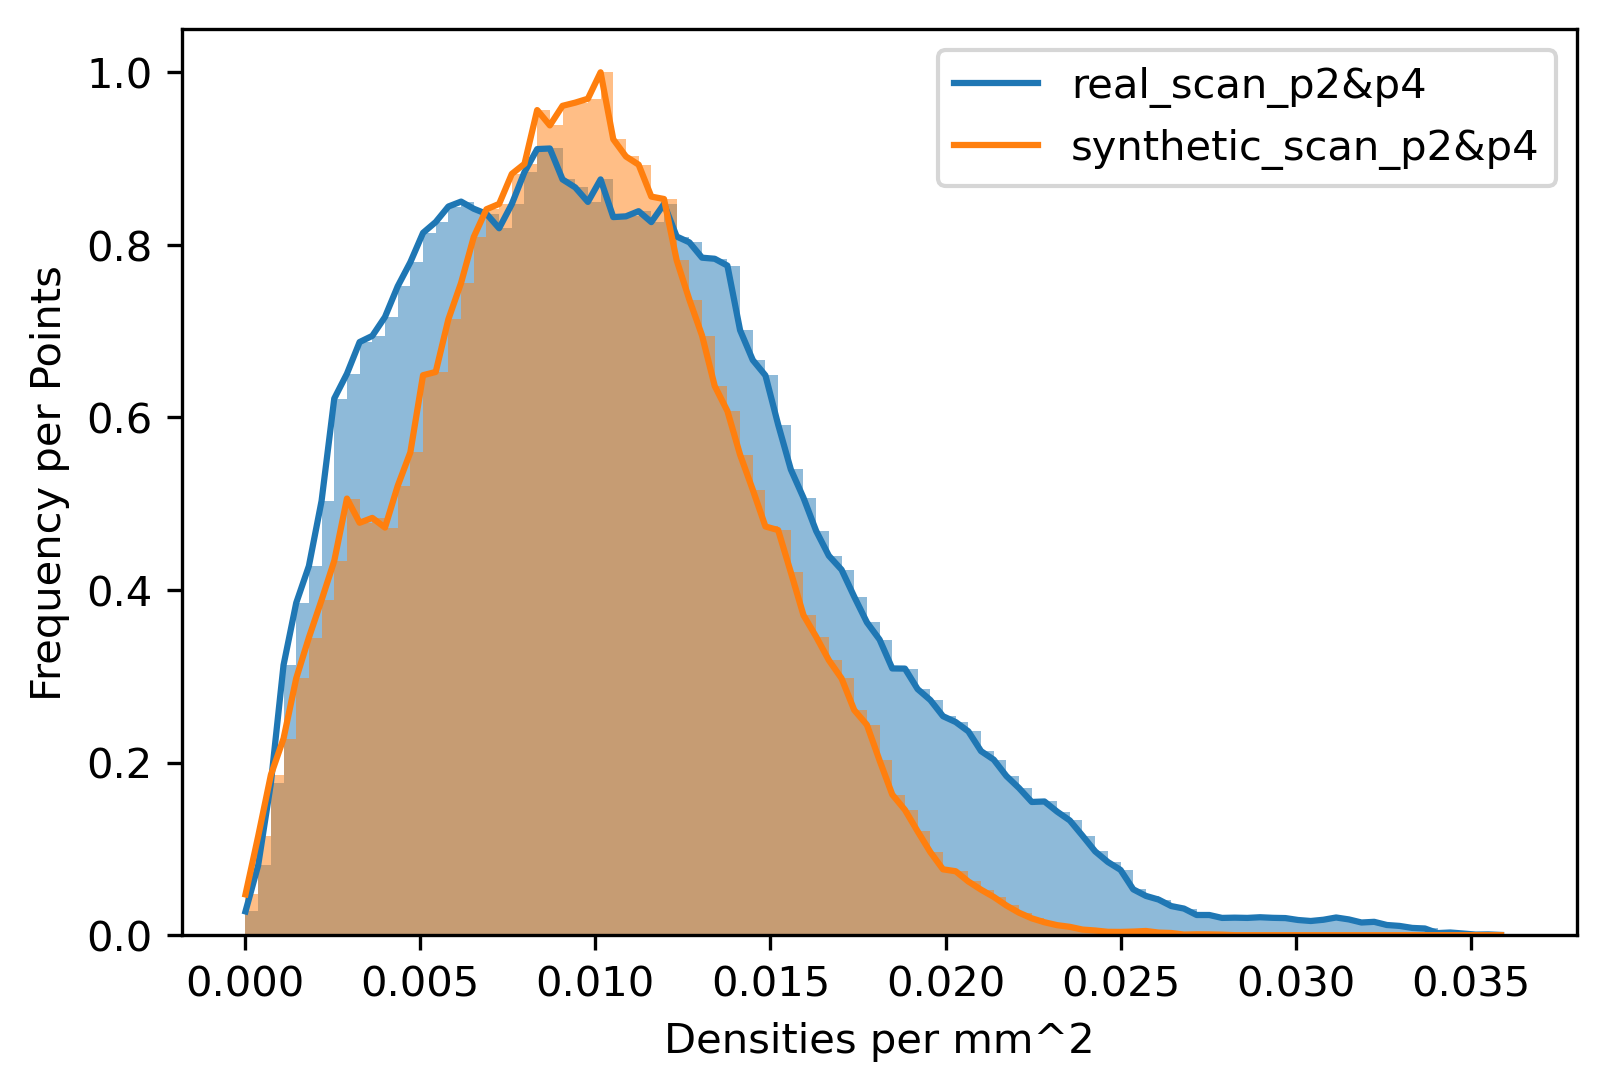

In [92]:
compare_densities(data_p2p4, nbins=100)

# Position 3 - center 

In [59]:
data_p3 = {
    "real_scan_p3": np.concatenate(list(dens_p3real.values())),
    "synthetic_scan_p3": np.concatenate(list(dens_p3sy.values()))
}

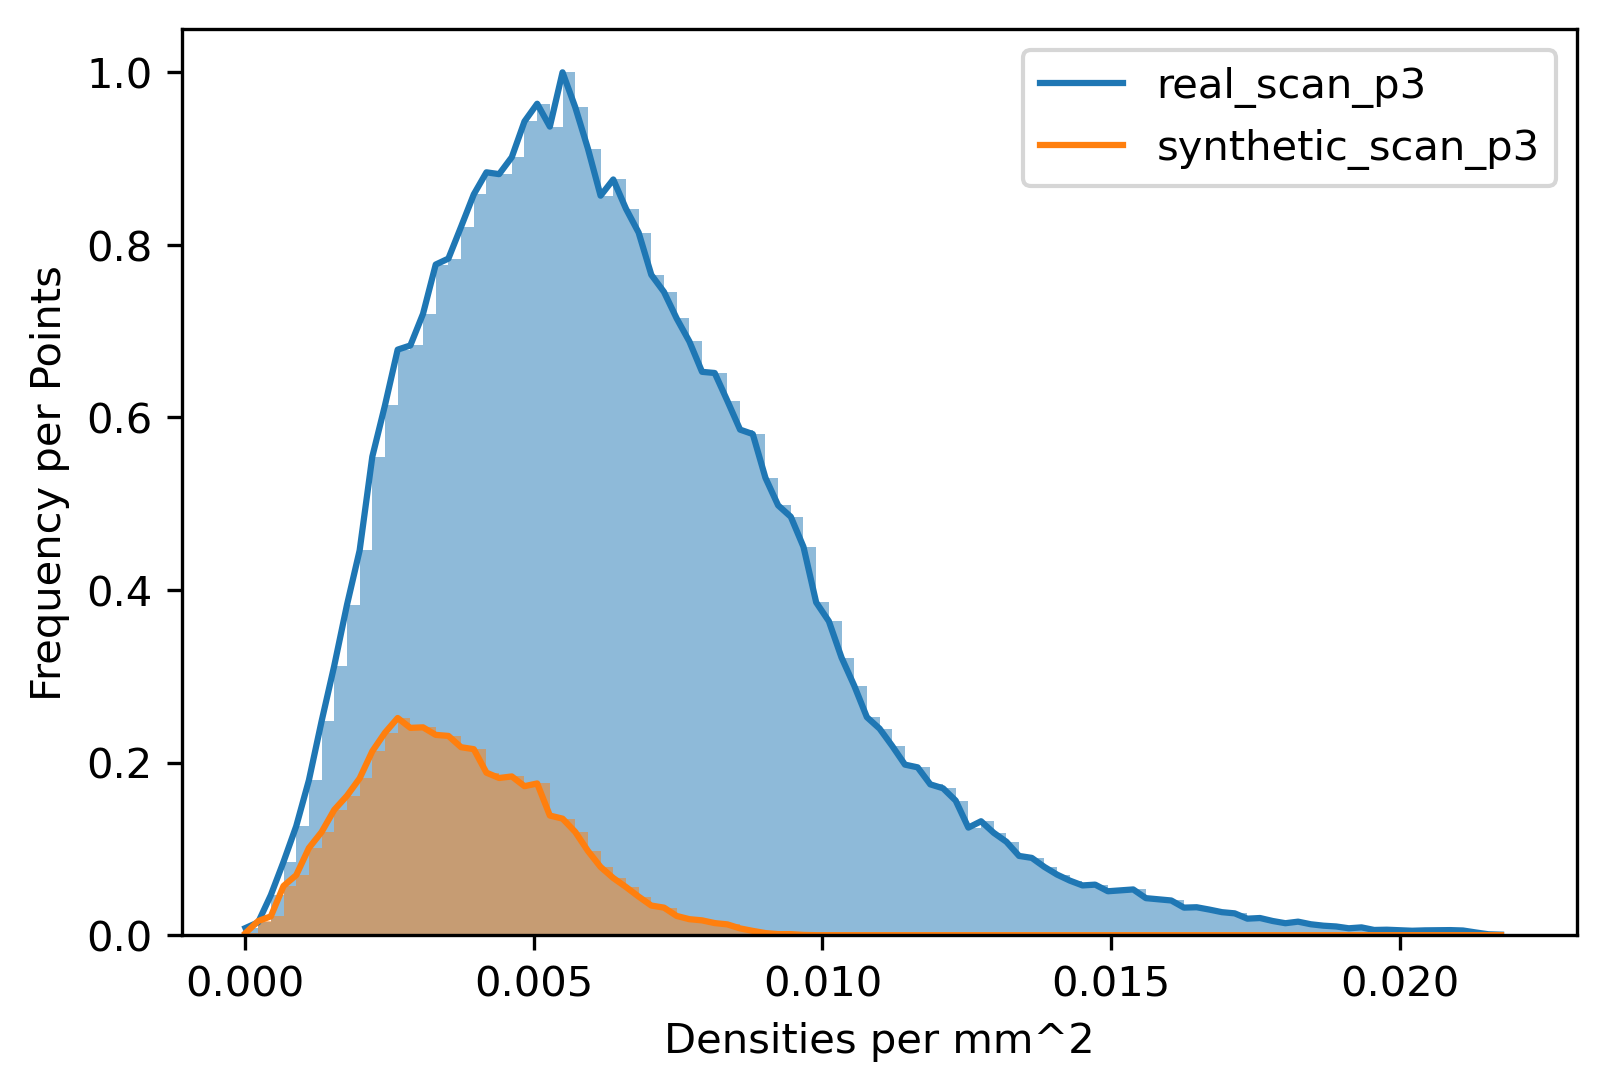

In [93]:
compare_densities(data_p3, nbins=100)

# Test

 -> Loading Data
-> Found 1 files

 -> Calculating Densities
-> OKty file [1/1]


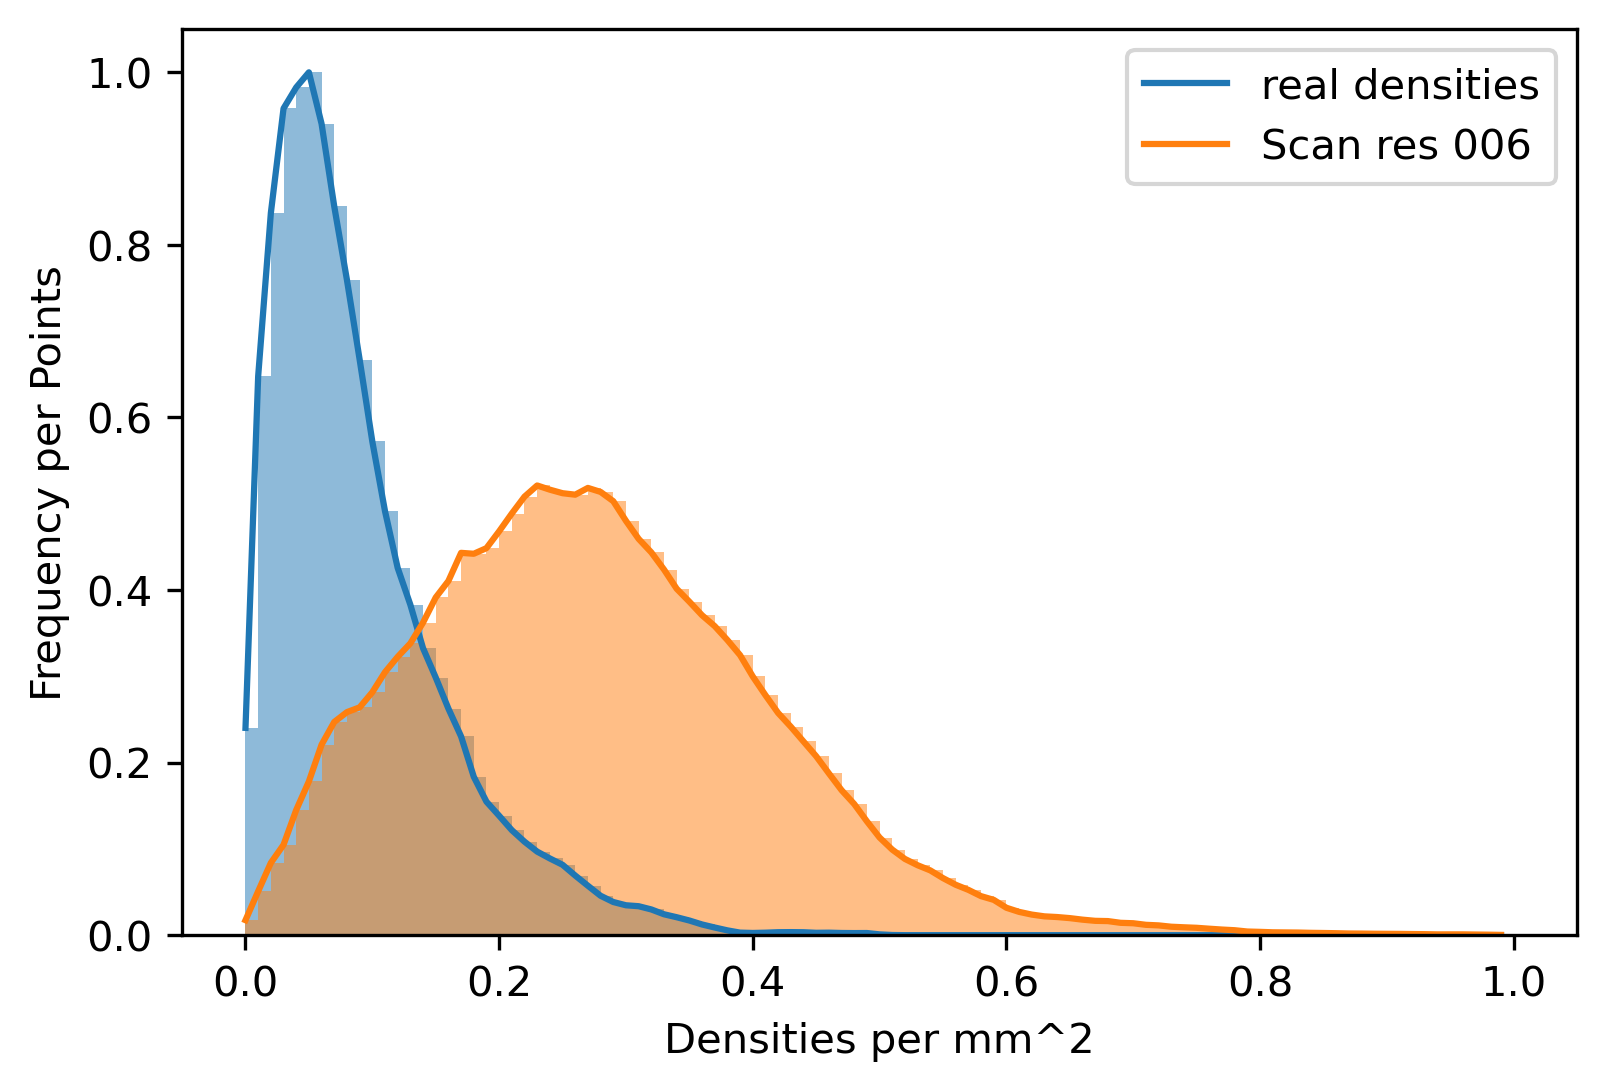

In [75]:
path2sres006 = "/home/jprb/Documents/synthetic_exp/220725_new_virtual_scan/to_evaluate/sress_006"
dens_scan006 =  compute_densities2(path2sres006)

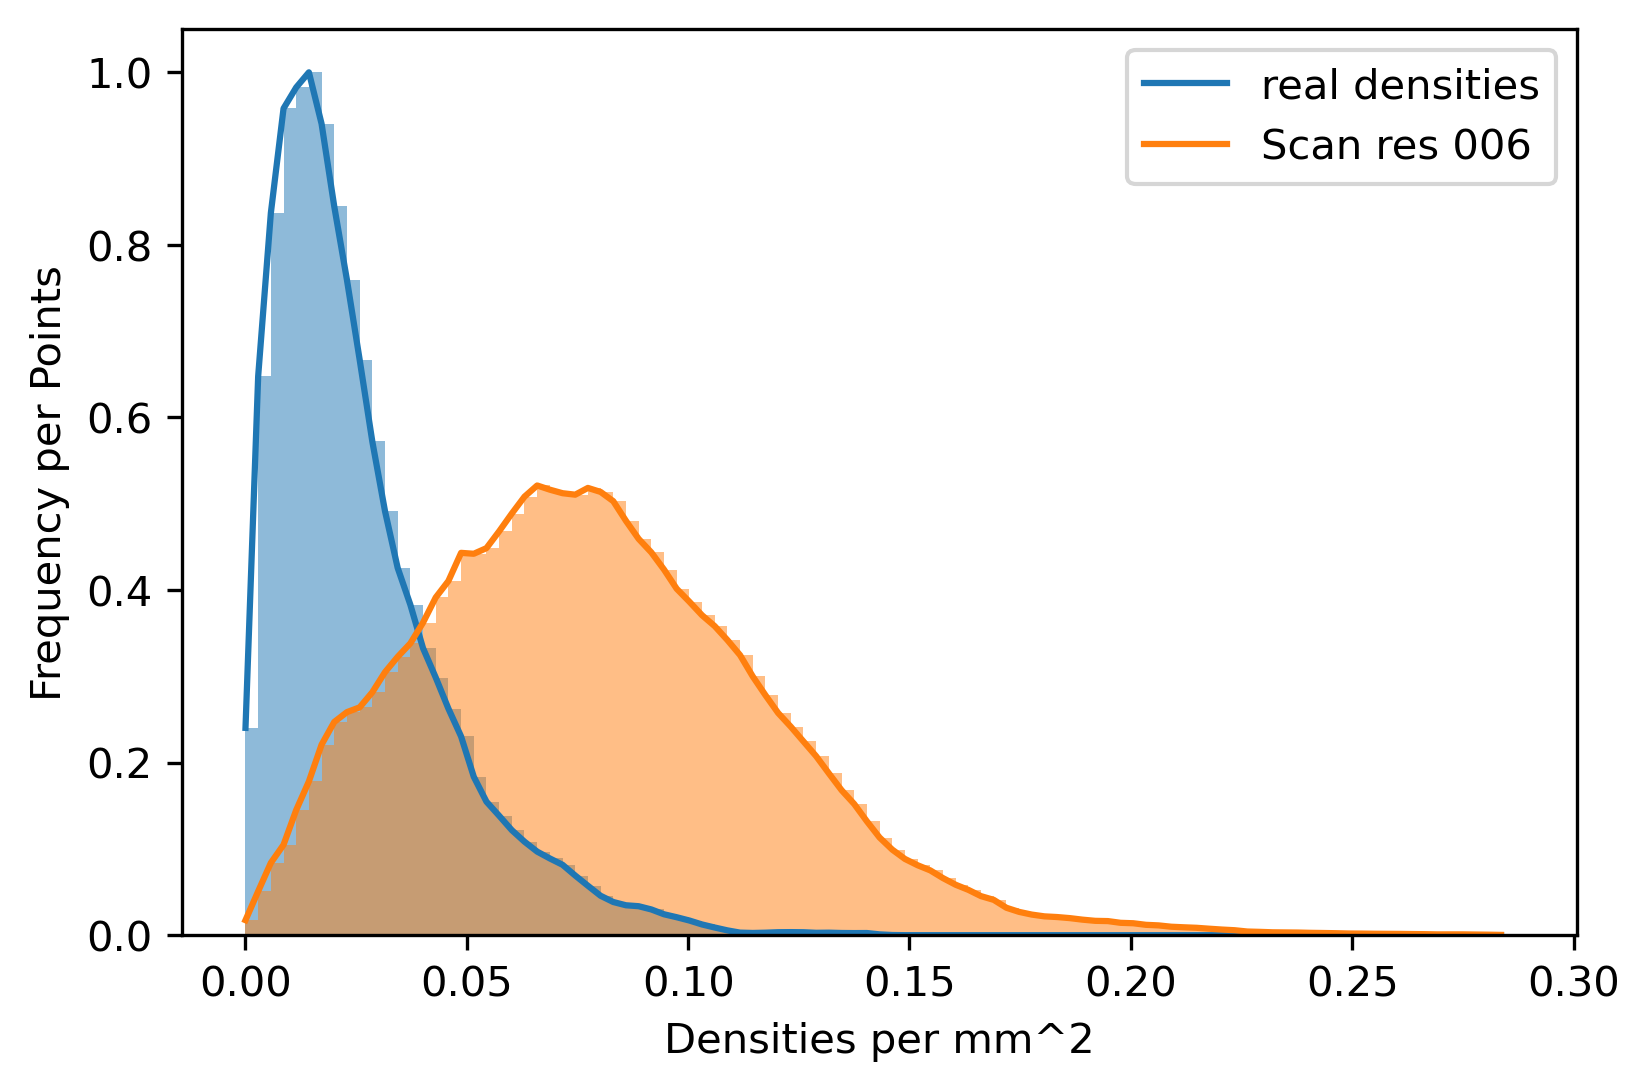

In [94]:
datasres006 = {
                "real densities" : np.concatenate(list(real_scans_densities.values())),
                "Scan res 006" : np.concatenate(list(dens_scan006.values())),
}
compare_densities(datasres006, nbins=100)